1. Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.

In [2]:
def reverse(s):
    word = ' '
    for i in s:
        word = i + word
    return word

reverse('forward')
    

'drawrof '

2. Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:
    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

In [6]:
def bayes(a, b_given_a, b_given_not_a):
    not_a = 1-a
    a_given_b = b_given_a * a / (a*b_given_a + not_a*b_given_not_a)
    return a_given_b

bayes(.2,.4,0.5)

0.16666666666666669

3. Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

 - Stolen bases per game- SB
 - Wins-W
 - Earned run average-ERA

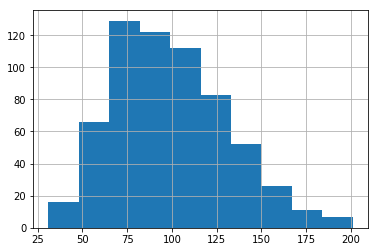

In [31]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\ojiang1\Desktop\Data Science\Sample data for checkpoint\lahman-teams.csv')

df_95=df[df.yearID>=1995]

SBPG=df_95.SB
SBPG.hist()
# Poisson distribution: represents the number of times a given event will occur during a given time interval. 

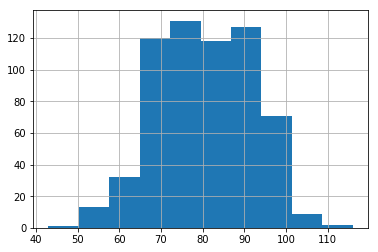

In [32]:
Win=df_95.W
Win.hist()
#Binomial distribution: represents the number of successes when an event with two or more distinct possible outcomes is repeated many time

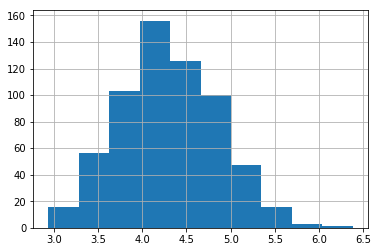

In [33]:
Earned_run_avg=df_95.ERA
Earned_run_avg.hist()
#normal distribution

b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

In [97]:
df1=df.dropna()

df1.groupby(['divID','yearID'])['ERA','W'].describe()

df1.groupby(['divID'])['ERA','W'].describe()

df1.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2325,2000,AL,ANA,ANA,W,3,162,81.0,82,80,...,182.0,0.978,Anaheim Angels,Edison International Field,2066982.0,102,103,ANA,ANA,ANA
2326,2000,NL,ARI,ARI,W,3,162,81.0,85,77,...,138.0,0.982,Arizona Diamondbacks,Bank One Ballpark,2942251.0,105,103,ARI,ARI,ARI
2327,2000,NL,ATL,ATL,E,1,162,81.0,95,67,...,138.0,0.979,Atlanta Braves,Turner Field,3234304.0,101,99,ATL,ATL,ATL
2328,2000,AL,BAL,BAL,E,4,162,81.0,74,88,...,151.0,0.981,Baltimore Orioles,Oriole Park at Camden Yards,3297031.0,95,96,BAL,BAL,BAL
2329,2000,AL,BOS,BOS,E,2,162,81.0,85,77,...,120.0,0.982,Boston Red Sox,Fenway Park II,2585895.0,104,103,BOS,BOS,BOS


In [94]:
c=df1[df1['divID']=='C']
e=df1[df1['divID']=='E']
w=df1[df1['divID']=='W']

c['ERA'].corr(c['W'])

-0.6841367571563899

In [91]:
e['ERA'].corr(e['W'])

-0.5720347793105088

In [92]:
w['ERA'].corr(w['W'])

-0.5669052753898063

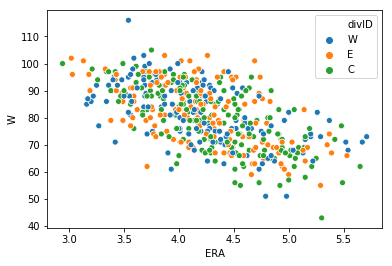

In [76]:
sns.scatterplot(x="ERA", y="W", hue="divID", data=df1);

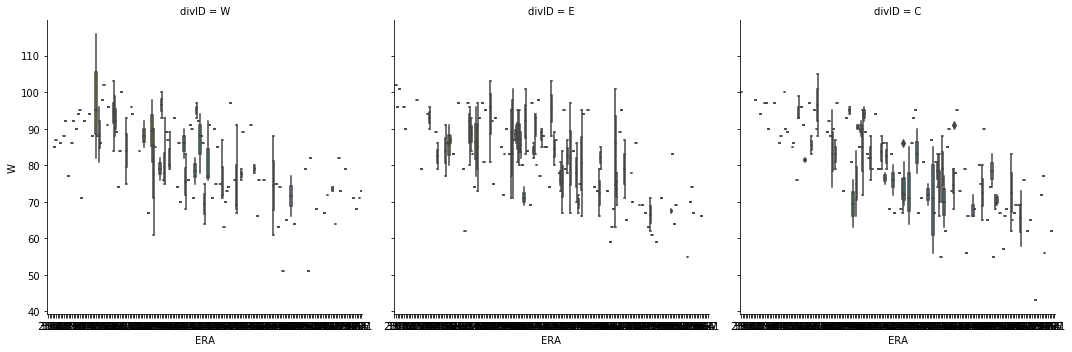

In [88]:
sns.catplot(y="W", x = "ERA", col="divID",kind="box", data=df1);

Supposably, the smaller the ERA the better chance to win. The negative relationship is proven given the correlations/plot for each division. however, three division react differently to ERA. 
So i want to look at what other stats affects the win.Based on the correlatio table below, FP is the second factor, next to ERA, that affacts win.

In [98]:
df1[['W', 'DP', 'FP','BPF','PPF']].corr()

,W,DP,FP,BPF,PPF
W,1.000000,-0.190669,0.371307,0.060660,-0.073037
DP,-0.190669,1.000000,-0.056134,0.076468,0.106442
FP,0.371307,-0.056134,1.000000,0.070591,0.008012
BPF,0.060660,0.076468,0.070591,1.000000,0.980064
PPF,-0.073037,0.106442,0.008012,0.980064,1.000000


4. Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].
1000 sample of size 100
W 
ERA

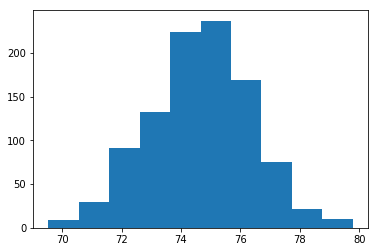

In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import randint
from numpy import mean

means = [mean(df['W'].sample(n=100)) for _ in range(1000)]

plt.hist(means)
plt.show()

'''
just look at the histgram, it looks like a normal distribution, 
but if we look at the data concept, it fits into a Binomial distribution.
by defination: represents the number of successes when an event with two or more distinct possible outcomes is repeated many time

'''

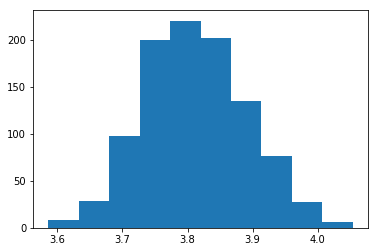

In [102]:
means = [mean(df['ERA'].sample(n=100)) for _ in range(1000)]

plt.hist(means)
plt.show()
'''
by the histgram, it looks like a normal distribution, 
and by the data concept, it fits into the description of normal distribution.
'''